## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
print('Number of rows: {}.'.format(df.shape[0]))

Number of rows: 294478.


c. The number of unique users in the dataset.

In [5]:
print('Number of unique users: {}.'.format(len(df.user_id.unique())))

Number of unique users: 290584.


d. The proportion of users converted.

In [6]:
print('Proportion of users converted: {}%.'.format(round(100*df.converted.sum()/df.shape[0],1)))

Proportion of users converted: 12.0%.


e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
df.loc[(df.landing_page=='new_page')&(df.group!='treatment')].shape[0]+df.loc[(df.landing_page!='new_page')&(df.group=='treatment')].shape[0]

3893

f. Do any of the rows have missing values?

In [11]:
print('The dataset presents {} missing values.'.format(df.isnull().sum().sum()))

The dataset presents 0 missing values.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2=df.loc[((df.landing_page=='new_page')&(df.group=='treatment'))|((df.landing_page=='old_page')&(df.group=='control'))]

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
print('Number of unique users: {}.'.format(len(df2.user_id.unique())))

Number of unique users: 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
print('user_id repeated in df2: {}.'.format(df2.user_id[df2.user_id.duplicated()].item()))

user_id repeated in df2: 773192.


c. What is the row information for the repeat **user_id**? 

In [16]:
print('User_id {} is repeated on rows {} and {} in df2.'.format(df2.user_id[df2.user_id.duplicated()].item(),df.loc[df.user_id==773192].index.to_list()[0],df.loc[df.user_id==773192].index.to_list()[1]))
df2.loc[df2.user_id==773192]

User_id 773192 is repeated on rows 1899 and 2893 in df2.


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2=df2.drop(index=2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
print('Probability of converting regardless of the page: {}.'.format((df2.converted==1).sum()/df2.shape[0]))

Probability of converting regardless of the page: 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
print('Probability of converting for individual in the control group: {}.'.format(((df2.converted==1)&(df2.group=='control')).sum()/df2.loc[df2.group=='control'].shape[0]))

Probability of converting for individual in the control group: 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
print('Probability of converting for individual in the treatment group: {}.'.format(((df2.converted==1)&(df2.group=='treatment')).sum()/df2.loc[df2.group=='treatment'].shape[0]))

Probability of converting for individual in the treatment group: 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [17]:
print('Probability of receiving the new page: {}.'.format((df2.landing_page=='new_page').sum()/len(df2.user_id.unique())))

Probability of receiving the new page: 0.5000619442226688.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [18]:
print('Probability of converting knowing that it is a new page: {}.'.format((df2.landing_page=='new_page').sum()/len(df2.user_id.unique())*((df2.converted==1)&(df2.group=='treatment')).sum()/df2.loc[df2.group=='treatment'].shape[0]))
print('Probability of converting knowing that it is an old page: {}.'.format((df2.landing_page=='old_page').sum()/len(df2.user_id.unique())*((df2.converted==1)&(df2.group=='control')).sum()/df2.loc[df2.group=='control'].shape[0]))
print('The summation of both equals the probability of converting regardless of the page: {}.'.format((df2.converted==1).sum()/df2.shape[0]))

Probability of converting knowing that it is a new page: 0.059411392230817935.
Probability of converting knowing that it is an old page: 0.06018569501417834.
The summation of both equals the probability of converting regardless of the page: 0.11959708724499628.


**Knowing the probability of receiving the new page and the conditional probability of conversion when receiving a new page, we can compute the total propability for the new page and the old page.
The calculations in the previous cell show that the new page presents a probability of converting of 0.059 compared to 0.060 for the old page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 - H0: the old page is better, the converted rate is higher on the old page: $p_{old}>=p_{new}$ 
 - H1: the new page is better, the converted rate is higher on the new page: $p_{old}<p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new=(df2.converted==1).sum()/df2.shape[0]
print('Convert rate p_new under the null: {}.'.format(p_new))

Convert rate p_new under the null: 0.11959708724499628.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old=(df2.converted==1).sum()/df2.shape[0]
print('Convert rate p_old under the null: {}.'.format(p_old))

Convert rate p_old under the null: 0.11959708724499628.


c. What is $n_{new}$?

In [21]:
n_new=(df2.landing_page=='new_page').sum()
print('Number of new pages n_new: {}.'.format(n_new))

Number of new pages n_new: 145310.


d. What is $n_{old}$?

In [22]:
n_old=(df2.landing_page=='old_page').sum()
print('Number of old pages n_old: {}.'.format(n_old))

Number of old pages n_old: 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
print(new_page_converted.mean())

0.11856720115614892


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
print(old_page_converted.mean())

0.11945014248936492


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
obs=new_page_converted.mean()-old_page_converted.mean()
print(obs)

-0.0008829413332159947


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
    old_page_converted=np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

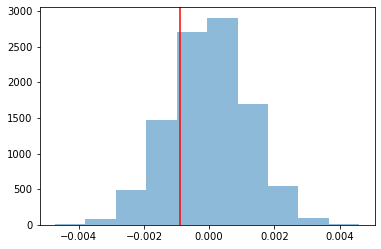

In [28]:
plt.figure()
plt.hist(p_diffs,alpha=.5)
plt.axvline(x=obs,color='r')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
print('{}% of the p_diffs is greater than the actual difference observed in ab_data.csv'.format(round(100*(np.max(p_diffs)-obs)/(np.max(p_diffs)-np.min(p_diffs)),2)))

58.78% of the p_diffs is greater than the actual difference observed in ab_data.csv


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The probability to obtain the null hypothethis was computed in part j; this is the p-value. We cannot conclude if there is a difference between the new and old page since the p-value is greater than 5%**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
convert_old = ((df2.converted==1)&(df2.landing_page=='old_page')).sum()/df2.loc[df2.landing_page=='old_page'].shape[0]
convert_new = ((df2.converted==1)&(df2.landing_page=='new_page')).sum()/df2.loc[df2.landing_page=='new_page'].shape[0]
n_old = (df2.landing_page=='new_page').sum()
n_new = (df2.landing_page=='old_page').sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
stat, pval = sm.stats.proportions_ztest([int(n_old*convert_old),int(n_new*convert_new)], [n_old,n_new])
print('zscore: {0:0.3f}\np-value: {1:0.3f}'.format(stat,pval))

zscore: 1.313
p-value: 0.189


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The difference between the average conversion rate for the new and old page is 1.3 standard deviation unit, the p-value of 0.19 shows that we fail to reject the null hypothesis. As previoiusly seen in j, k we cannot state that there is a significant difference between the new and old page**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be achieved by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**A logistic regression should be performed**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df2['group']).astype('int64')
df2=df2.drop('control',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
logmod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results=logmod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:43:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated to ab_page is 0.190. In this logistic regression model, the high p-value of ab_page shows that the variable ab_page does not help in predicting the conversion rate. This is consistent with the conlusions of part II, where the p-value calculated was 1.189 and indicated that the average conversion rate for the new page was not significantly different from the old page. We fail to reject the null hypothesis: $p_{old}>=p_{new}$.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other factors could help increasing the accuracy of the model, by capturing other factors that coud have an effect on wheter or not an individual converts. An interaction term between the ab_page and an additional variable characterizing the user (such as age, gender, country, ...) could help improving the regression model. 
In our case, the group variable and landing_page are correlated and already included in the ab_page variable so there is no point in adding those.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [37]:
print(df_new.country.unique())
df_new[df_new.country.unique().tolist()]=pd.get_dummies(df_new.country)
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']
df_new.head()

['UK' 'US' 'CA']


,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,ab_UK,ab_CA,ab_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
logmod=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','ab_UK','ab_US']])
results=logmod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Jul 2020   Pseudo R-squ.:               3.351e-05
Time:                        21:05:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
ab_UK         -0.0644      0.038     -1.679      0.093      -0.140       0.011
ab_US          0.0257      0.019      1.363      0.173      -0.011       0.063
==============================================================================
"""

In [47]:
print('Interpreting coefs:\n',np.exp(results.params[1:]))

Interpreting coefs:
 ab_page    0.981901
ab_UK      0.937618
ab_US      1.025986
dtype: float64


With an additional variable bringing information about the country of the user, the accuracy of the model increased from a pseudo-R squared value of 8e-6 to 3e-5. The accuracy of the model is still low to be used for prediction, however the p-value corresponding to the ab_UK is under 5%. So by comparing the conversion rate between old and new page after filtering by countries, a statiscally significant difference in the average conversion rate between the old and new page is oberserved. The null hypothesis is then rejected for the alternative hypothesis: $p_{old}<p_{new}$, for the country of UK. We fail to reject the null hypothesis for Canada and US.

Interpreting the coefficients of the logistic regression model shows that within the category CA or US, we expect a multiplicative change by about 1 compared to the baseline (UK).

<a id='conclusions'></a>
## Conclusions
The analysis over the sections I and II showed that the difference of the average conversion rate between the old and new page is not statistically significant. In section III, we oberserved a statiscally significant difference in the average conversion rate between the old and new page for the United Kingdom. Adding other information such as the age or the gender of the user might help filtering the users and find other categories showing a statiscally significant difference in the average conversion rate between the old and new page.